In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [3]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rc('text', usetex = False)

In [4]:
df = pd.read_csv("../expression DB/source/CM334.NaCl.TPM.avg.txt", sep = '\t', index_col=0)

In [5]:
df

,Mock_0h,Mock_3h,Mock_6h,Mock_12h,Mock_24h,Mock_72h,NaCl_3h,NaCl_6h,NaCl_12h,NaCl_24h,NaCl_72h
GeneID,,,,,,,,,,,
CA.PGAv.1.6.scaffold567.118,0.121139,0.482892,0.138156,0.508467,0.656463,0.414723,0.263095,0.671267,0.471098,0.720600,0.867198
CA.PGAv.1.6.scaffold567.113,6.509156,3.672705,3.212653,3.974025,4.119062,4.610665,5.485224,5.635988,5.477396,7.262398,5.862813
CA.PGAv.1.6.scaffold567.111,17.784724,20.031629,9.326638,3.675606,22.811612,12.795550,8.028885,4.441776,3.211605,10.723128,6.018079
CA.PGAv.1.6.scaffold567.112,42.043259,40.667184,77.759989,86.419162,38.504345,17.972231,35.833298,46.295118,51.604332,44.122328,33.698086
CA.PGAv.1.6.scaffold567.109,3.235666,3.442350,2.805854,2.293769,4.315926,4.345633,2.690529,2.765639,6.208292,2.228136,2.635986
...,...,...,...,...,...,...,...,...,...,...,...
CA.PGAv.1.6.scaffold33767.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CA.PGAv.1.6.scaffold34263.1,0.000000,0.238572,0.303790,0.952727,0.213910,0.000000,0.335464,0.571883,0.564612,0.000000,0.000000
CA.PGAv.1.6.scaffold35709.1,1.069721,0.094869,0.000000,0.000000,0.000000,0.000000,0.000000,0.026184,0.000000,0.000000,0.107774


In [6]:
list(df.columns)

['Mock_0h',
 'Mock_3h',
 'Mock_6h',
 'Mock_12h',
 'Mock_24h',
 'Mock_72h',
 'NaCl_3h',
 'NaCl_6h',
 'NaCl_12h',
 'NaCl_24h',
 'NaCl_72h']

In [7]:
df = df[['Mock_0h',
 'Mock_3h',
 'Mock_6h',
 'Mock_12h',
 'Mock_24h',
 'Mock_72h',
 'NaCl_3h',
 'NaCl_6h',
 'NaCl_12h',
 'NaCl_24h',
 'NaCl_72h']]

In [8]:
df.columns = ['Mock_0h',
 'Mock_3h',
 'Mock_6h',
 'Mock_12h',
 'Mock_24h',
 'Mock_72h',
 'NaCl_3h',
 'NaCl_6h',
 'NaCl_12h',
 'NaCl_24h',
 'NaCl_72h']

In [9]:
Mock = df[[ 
 'Mock_0h',
 'Mock_3h',
 'Mock_6h',
 'Mock_12h',
 'Mock_24h',
 'Mock_72h',
]]

In [10]:
NaCl = df[[
 'Mock_0h',
 'NaCl_3h',
 'NaCl_6h',
 'NaCl_12h',
 'NaCl_24h',
 'NaCl_72h'
]]

In [11]:
Mock.columns = [ 
 '0h',
 '3h',
 '6h',
 '12h',
 '24h',
 '72h'
]
NaCl.columns = [ 
 '0h',
 '3h',
 '6h',
 '12h',
 '24h',
 '72h'
]

In [39]:
target_gene = ["CaCM334_MYB.PGAv.1.6.scaffold912.1"]

In [40]:
NaCl

,0h,3h,6h,12h,24h,72h
GeneID,,,,,,
CA.PGAv.1.6.scaffold567.118,0.121139,0.263095,0.671267,0.471098,0.720600,0.867198
CA.PGAv.1.6.scaffold567.113,6.509156,5.485224,5.635988,5.477396,7.262398,5.862813
CA.PGAv.1.6.scaffold567.111,17.784724,8.028885,4.441776,3.211605,10.723128,6.018079
CA.PGAv.1.6.scaffold567.112,42.043259,35.833298,46.295118,51.604332,44.122328,33.698086
CA.PGAv.1.6.scaffold567.109,3.235666,2.690529,2.765639,6.208292,2.228136,2.635986
...,...,...,...,...,...,...
CA.PGAv.1.6.scaffold33767.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CA.PGAv.1.6.scaffold34263.1,0.000000,0.335464,0.571883,0.564612,0.000000,0.000000
CA.PGAv.1.6.scaffold35709.1,1.069721,0.000000,0.026184,0.000000,0.000000,0.107774


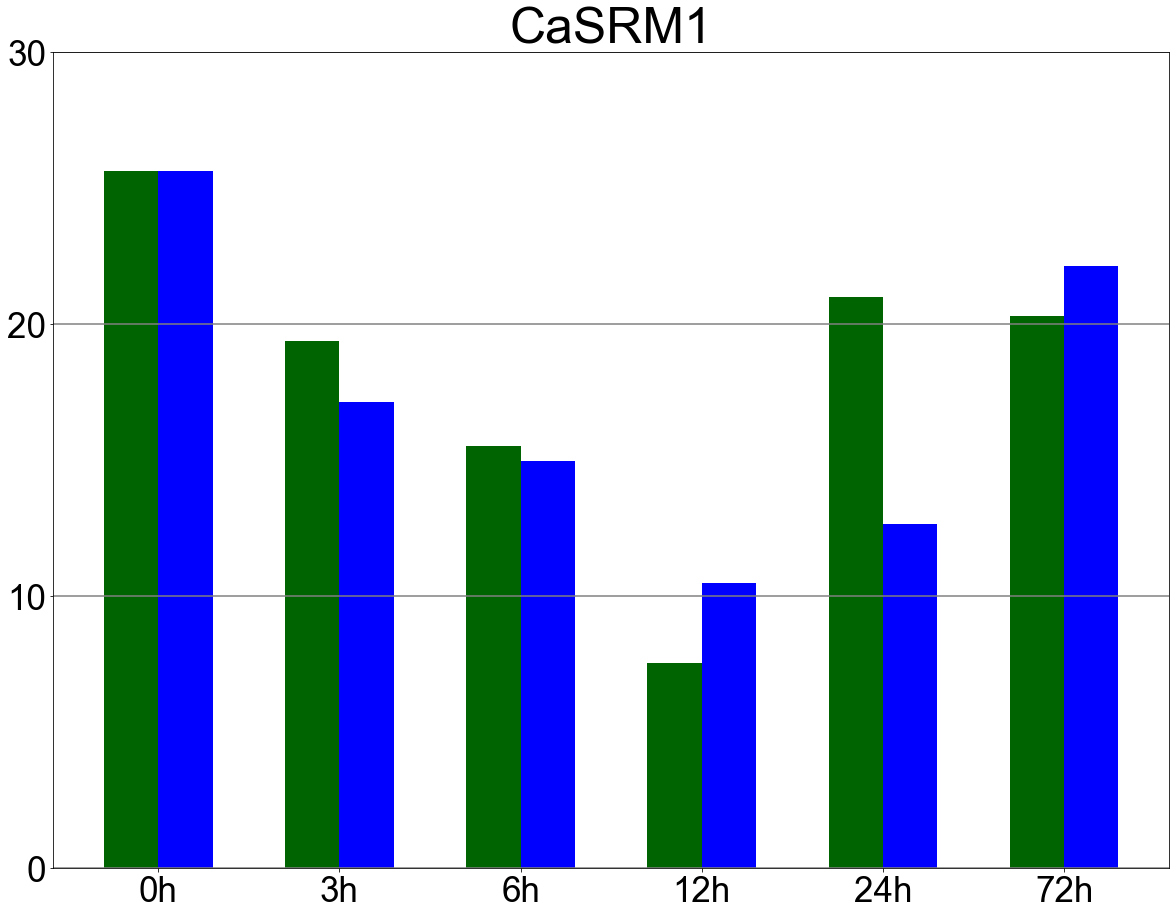

In [43]:
plt.figure(figsize=(20, 15))

# color_code = [color_table_CM334[col] for col in df.columns]
width = 0.3
time = [0, 3, 6, 12, 24, 72]

x = np.arange(len(time))
yticks = [0, 10, 20, 30]

for val in yticks:
    plt.axhline(val, color = "grey")
    
plt.bar(x-width/2, Mock.loc[target_gene[0], :], color = "darkgreen", width = width, label = "Mock")
plt.bar(x+width/2, NaCl.loc[target_gene[0], :], color = "blue", width = width, label = "NaCl")
plt.xticks(x, Mock.columns, fontsize = 35,  horizontalalignment="center")
# ax.set_xticks(x, TDW.columns)
plt.yticks(yticks, fontsize = 35)

plt.title('CaSRM1', fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# ax1.get_yaxis().set_major_formatter(
# tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
# plt.legend(fontsize = 40)

"""
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
for val in yticks:
    plt.axhline(val, color = "grey")


plt.yticks(yticks, fontsize = 45)
plt.xticks(Pc.columns, ["0h", "1h", "2h", "4h", "6h", "12h", "1D"],  fontsize = 45,  horizontalalignment="center")
plt.title("P. capsici", fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# ax2.get_yaxis().set_major_formatter(
# tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
"""



"""
ax2 = plt.subplot(3, 1, 3, sharex = ax1)
yticks = [10, 20, 30, 40, 50]
for val in yticks:
    plt.axhline(val, color = "grey")

plt.bar(df.columns, df.loc[target_gene[2], :], color = color_code, edgecolor = 'white')
plt.yticks(yticks, fontsize = 40)
plt.xticks(df.columns, rotation = 50, fontsize = 40,  horizontalalignment="center")
plt.title(target_gene[2], fontsize = 50)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
ax2.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().margins(y= 0)
"""

# plt.savefig("CaPRR2_1_NaCl.png", bbox_inches = "tight")
plt.show()